1. What are the demographic characteristics of areas with currently operating breweries, and what are the characteristics of areas where breweries closed? 
2. What areas in the U.S. state, state, region have the most breweries with the highest density?
3. Based on density analysis, what areas seem compatible demographically but still lacking breweries or with lower competition levels?


In [41]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np

In [42]:
breweries_data = "../desktop/project1_resources/merged_df_cleaned.csv"
breweries_df = pd.read_csv(breweries_data)
breweries_df.head()

,name,brewery_type,address_1,City,State,postal_code,longitude,latitude,state_x,zip_code,...,housing_in_structure_percent,population_total,population_over_21,population_over_21_percent,population_15_to_19,population_15_to_19_percent,population_male_over_18,population_male_over_18_percent,population_female_over_18,population_female_over_18_percent
0,(405) Brewing Co,micro,1716 Topeka St,Norman,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069,...,57307.0,128087.0,92914.0,72.5,12803.0,10.0,52250.0,48.7,54931.0,51.3
1,10 Barrel Brewing Co,large,1501 E St,San Diego,California,92101-6618,-117.129593,32.714813,California,92101,...,555456.0,1381600.0,1057949.0,76.6,87255.0,6.3,574112.0,51.2,547406.0,48.8
2,10 Barrel Brewing Co,large,62970 18th St,Bend,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701,...,47882.0,102079.0,80025.0,78.4,5002.0,4.9,40641.0,49.5,41473.0,50.5
3,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Bend,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703,...,47882.0,102079.0,80025.0,78.4,5002.0,4.9,40641.0,49.5,41473.0,50.5
4,10 Barrel Brewing Co,large,1411 NW Flanders St,Portland,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209,...,303483.0,642218.0,515575.0,80.3,31016.0,4.8,264448.0,49.4,270792.0,50.6


In [43]:
countState = breweries_df.groupby(["State", "brewery_type"])["brewery_type"].count()
countState

State      brewery_type
Alabama    brewpub          3
           contract         1
           micro           17
           planning         4
Arizona    brewpub         36
                           ..
Wisconsin  planning         3
           proprietor       1
           regional         2
Wyoming    brewpub          1
           micro            2
Name: brewery_type, Length: 229, dtype: int64

Text(0.5, 1.0, 'Number of Breweries in California')

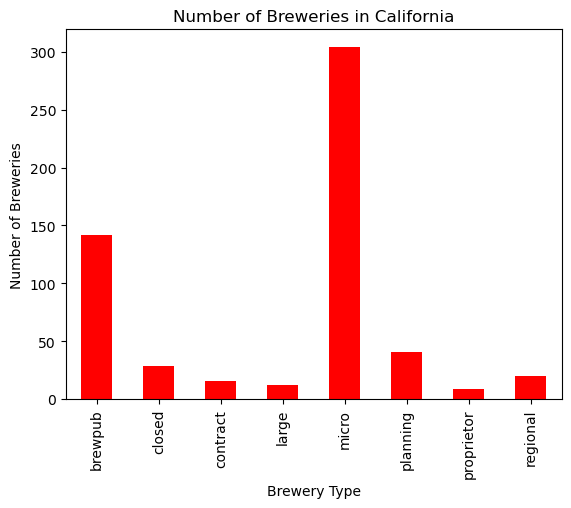

In [44]:
plot_California = countState["California"].plot.bar(color='red', stacked=True)
plt.xlabel("Brewery Type")
plt.ylabel("Number of Breweries")
plt.title("Number of Breweries in California")

Text(0.5, 1.0, 'Number of Breweries in Delaware')

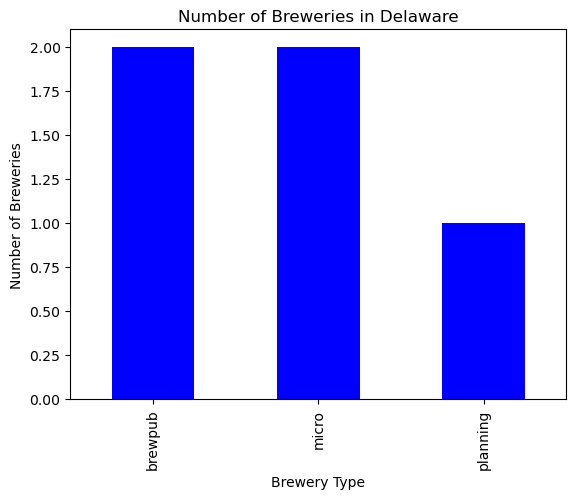

In [50]:
plot_Mississippi = countState["Delaware"].plot.bar(color='blue', stacked=True)
plt.xlabel("Brewery Type")
plt.ylabel("Number of Breweries")
plt.title("Number of Breweries in Delaware")

In [51]:
# Bar graph brewries by state by type
#no_planning_closed_breweries = breweries_df.loc[(breweries_df["brewery_type"] != "planning") + (breweries_df["brewery_type"] != "closed")]
micro_pub_breweries = breweries_df.loc[(breweries_df["brewery_type"] == "pub") + (breweries_df["brewery_type"] == "micro")]
california_breweries = breweries_df.loc[breweries_df["State"] == "California"]
delaware_breweries = breweries_df.loc[breweries_df["State"] == "Delaware"]


In [27]:
map_plot_1 = micro_pub_breweries.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600    
)
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]

Map of all micro and pub breweries in the U.S.

In [36]:
map_plot_2 = california_breweries.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600    
)
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]

Map of micro/pub breweries in California (highest state)

In [55]:
map_plot_3 = delaware_breweries.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600    
)
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]

Map of Breweries in Delaware (lowest state)